# Dataset preparation

In [1]:
import pandas as pd

In [2]:
# Get the embeddings
embeddings = pd.read_csv("data/OsmoticStress_with_binary_positions_and_embeddings.csv", index_col=0)
embeddings = embeddings.drop(columns=["full_sequence"])

# Get the dataset
df = pd.read_csv('data/OsmoticStress_with_binary_positions.csv')
df.drop(columns=['full_sequence', 'Peptide_sequence'], inplace=True)
df.set_index('Uniprot_ID', inplace=True)

# Merge the two and get the final dataset
dataset = df.merge(embeddings, left_index=True, right_index=True)

In [3]:
dataset.head()

,Log2FC(LiP_norm),Binary_Positions,full_embedding
Uniprot_ID,,,
P15703,-2.176707,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."
P15703,0.285029,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."
P15703,-0.498240,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."
P15703,0.348193,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."
P15703,-0.434615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."


In [4]:
import re

def convert_to_list(number_string):
    cleaned_string = re.sub(r"[^\d,\s]", "", number_string)
    return list(map(int, cleaned_string.split(',')))

dataset['full_embedding'] = dataset['full_embedding'].apply(convert_to_list)
dataset['Binary_Positions'] = dataset['Binary_Positions'].apply(convert_to_list)

# Creating combined embedding

In [5]:
import torch
import torch.nn as nn
import numpy as np

embedding_array = np.array(dataset['full_embedding'].tolist(), dtype=np.float32)
full_embedding = torch.tensor(embedding_array)

position_embedding_dim = len(dataset.iloc[0, 2]) 
num_positions = 20
position_embedding = nn.Embedding(num_embeddings=num_positions, embedding_dim=position_embedding_dim)

position_indices = torch.tensor([x[0] for x in dataset['Binary_Positions']])

position_embed = position_embedding(position_indices)

combined_embeddings = position_embed + full_embedding

combined_embeddings_list = combined_embeddings.tolist()

In [6]:
# Create a new DataFrame using the original DataFrame's index
X = pd.DataFrame(combined_embeddings_list, index=dataset.index)

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
Uniprot_ID,,,,,,,,,,,,,,,,,,,,,
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16


In [8]:
y = dataset['Log2FC(LiP_norm)']

In [9]:
y.head()

Uniprot_ID
P15703   -2.176707
P15703    0.285029
P15703   -0.498240
P15703    0.348193
P15703   -0.434615
Name: Log2FC(LiP_norm), dtype: float64

In [10]:
y.describe()

count    31837.000000
mean         0.012010
std          0.737756
min        -14.358960
25%         -0.279373
50%         -0.001432
75%          0.298198
max         10.948098
Name: Log2FC(LiP_norm), dtype: float64

# Model Training

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy

# Model definition based on suggestion
class PeptideRegressor(nn.Module):
    def __init__(self, input_dim, num_heads, dropout_rate):
        super(PeptideRegressor, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout_rate, batch_first=True)
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(input_dim, 1) 

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        transposed = attn_output.transpose(1, 2)
        pooled = self.pooling(transposed)
        flattened = pooled.squeeze(-1)
        output = self.fc(flattened)
        return output

# Train test split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Reshape the data for the model, because it expects tensor with the whole sequence as the first dimension
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)

# Initialize the model
input_dim = 1280  # number of features in each peptide embedding
num_heads = 4     # number of attention heads
dropout_rate = 0.01
model = PeptideRegressor(input_dim=input_dim, num_heads=num_heads, dropout_rate=dropout_rate)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training settings
n_epochs = 5
batch_size = 10
best_val_loss = float('inf')
train_losses = []
val_losses = []

# Training loop
for epoch in range(n_epochs):
    model.train()
    batch_losses = []
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    train_losses.append(sum(batch_losses) / len(batch_losses))
    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}')

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test)
        mae = nn.L1Loss()(y_pred, y_test)

        val_loss = mse
        val_losses.append(val_loss.item())
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model = copy.deepcopy(model.state_dict())
        print(f'Epoch {epoch+1}, Test MSE: {mse.item()}, Test MAE: {mae.item()}')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/var/folders/n5/xlvtzg2n1pdgsqprfsbyr3w00000gn/T/ipykernel_32810/2064531160.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
/var/folders/n5/xlvtzg2n1pdgsqprfsbyr3w00000gn/T/

Epoch 1, Train Loss: 0.6681556363459283
Epoch 1, Test MSE: 0.5483933687210083, Test MAE: 0.4794991910457611
Epoch 2, Train Loss: 0.530063372727913
Epoch 2, Test MSE: 0.562732458114624, Test MAE: 0.4897930324077606
Epoch 3, Train Loss: 0.48661356210498036
Epoch 3, Test MSE: 0.6189867258071899, Test MAE: 0.5271170735359192
Epoch 4, Train Loss: 0.45743528983529413
Epoch 4, Test MSE: 0.6667207479476929, Test MAE: 0.5544813871383667
Epoch 5, Train Loss: 0.43397777365122
Epoch 5, Test MSE: 0.7020241618156433, Test MAE: 0.572607696056366


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Convert to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)  # Adding a dimension for the target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the regression model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

input_dim = X_tensor.shape[1]
model = RegressionModel(input_dim)

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')



Test Loss: 1311000475038915026618052012670976.0000


Matplotlib is building the font cache; this may take a moment.


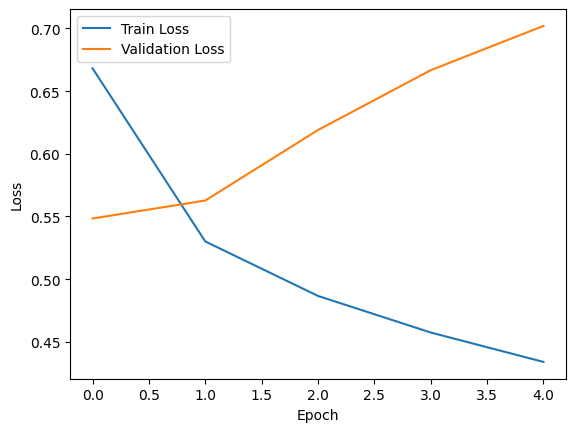

In [18]:
# plot the training and validation losses
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [41]:
# Test model in test set
# Just run one time!

model.load_state_dict(best_model)
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    test_mse = loss_fn(y_test_pred, y_test)
    print(f'Final Test MSE: {test_mse.item()}')

Final Test MSE: 0.5482683777809143
